






#Analyze and forecast sales of pesticides for a domestic pesticide manufacturing company (ABC Manufacturing) and analyze variables that impact the sales of the product.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_sales= pd.read_csv("Sales_Forecast_Data.csv")

In [3]:
df_sales.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230152 entries, 0 to 230151
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FIN_YEAR  230152 non-null  object 
 1   MONTH     230152 non-null  object 
 2   STATE     230152 non-null  object 
 3   FG        230152 non-null  object 
 4   DISTRICT  230152 non-null  object 
 5   COMPANY   230152 non-null  object 
 6   VALUE     230152 non-null  float64
dtypes: float64(1), object(6)
memory usage: 12.3+ MB


In [5]:
df_sales.shape

(230152, 7)

In [6]:
df_sales.drop_duplicates(inplace=True)
df_sales.shape

(218184, 7)

In [7]:
#converting Month names in month numbers

In [8]:
month_num= {'MONTH':{'Jan': 1,'Feb': 2,'Mar': 3,'Apr': 4,'May': 5,'Jun': 6,'Jul': 7,'Aug': 8,'Sep': 9, 'Oct': 10,'Nov': 11,'Dec': 12}}
df_sales.replace(month_num,inplace=True)
df_sales.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,11,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,11,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,11,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,11,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,11,Haryana,Insecticides,Palwal,monous,5188.59


In [9]:
years={'FIN_YEAR':{"2014-2015": 2014, "2015-2016": 2015, "2016-2017": 2016, "2017-2018":2017}}
df_sales.replace(years,inplace=True)

In [10]:
df_sales['FIN_YEAR']= df_sales.apply(lambda x: '%s-%s' % (x['FIN_YEAR'],x['MONTH']),axis=1)

In [11]:
df_sales['FIN_YEAR']=pd.to_datetime(df_sales['FIN_YEAR'])

In [12]:
df_sales.drop("MONTH", axis=1, inplace =True)

In [13]:
df_sales.head()

,FIN_YEAR,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-11-01,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-11-01,Haryana,Insecticides,Rewari,monous,73.71
2,2014-11-01,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-11-01,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-11-01,Haryana,Insecticides,Palwal,monous,5188.59


#Converting data in quarterly format

In [14]:
df_sales['QUARTERS'] = df_sales['FIN_YEAR'].dt.to_period('Q')

In [15]:
df_sales['QUARTERS']

0         2014Q4
1         2014Q4
2         2014Q4
3         2014Q4
4         2014Q4
           ...  
230147    2016Q4
230148    2016Q4
230149    2016Q4
230150    2016Q4
230151    2016Q1
Name: QUARTERS, Length: 218184, dtype: period[Q-DEC]

In [16]:
df_sales.head()

,FIN_YEAR,STATE,FG,DISTRICT,COMPANY,VALUE,QUARTERS
0,2014-11-01,Haryana,Insecticides,Rohtak,monous,675.00,2014Q4
1,2014-11-01,Haryana,Insecticides,Rewari,monous,73.71,2014Q4
2,2014-11-01,Haryana,Insecticides,Gurgaon,monous,405.00,2014Q4
3,2014-11-01,Haryana,Insecticides,Mewat,monous,1188.00,2014Q4
4,2014-11-01,Haryana,Insecticides,Palwal,monous,5188.59,2014Q4


as the data is follow indian finalcial year so converting quarters as per indian financial calender from apr-Mar

In [17]:
df_sales.QUARTERS=df_sales.QUARTERS.astype(str)

In [18]:
Quarter={'QUARTERS':{'2014Q1':'2013Q4', '2014Q2':'2014Q1', '2014Q3':'2014Q2', '2014Q4':'2014Q3',
                     '2015Q1':'2014Q4', '2015Q2':'2015Q1', '2015Q3':'2015Q2', '2015Q4':'2015Q3',
                     '2016Q1':'2015Q4', '2016Q2':'2016Q1', '2016Q3':'2016Q2', '2016Q4':'2016Q3',
                     '2017Q1':'2016Q4', '2017Q2':'2017Q1', '2017Q3':'2017Q2', '2017Q4':'2017Q3'}}
df_sales.replace(Quarter, inplace=True)

In [19]:
df_sales.head()

,FIN_YEAR,STATE,FG,DISTRICT,COMPANY,VALUE,QUARTERS
0,2014-11-01,Haryana,Insecticides,Rohtak,monous,675.00,2014Q3
1,2014-11-01,Haryana,Insecticides,Rewari,monous,73.71,2014Q3
2,2014-11-01,Haryana,Insecticides,Gurgaon,monous,405.00,2014Q3
3,2014-11-01,Haryana,Insecticides,Mewat,monous,1188.00,2014Q3
4,2014-11-01,Haryana,Insecticides,Palwal,monous,5188.59,2014Q3


In [20]:
sale_data= df_sales

In [21]:
#df_sales.set_index('QUARTERS', inplace=True)

In [22]:
df1=df_sales.groupby('STATE').sum()['VALUE'].reset_index()
df1.round()

,STATE,VALUE
0,Haryana,28004513.0
1,Himachal Pradesh,1109632.0
2,Punjab,38632144.0
3,Uttar Pradesh,90327653.0
4,Uttarakhand,4152091.0


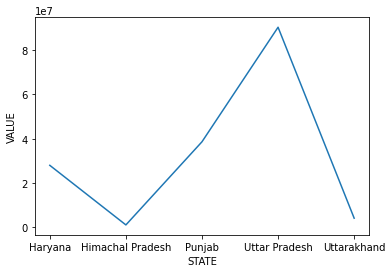

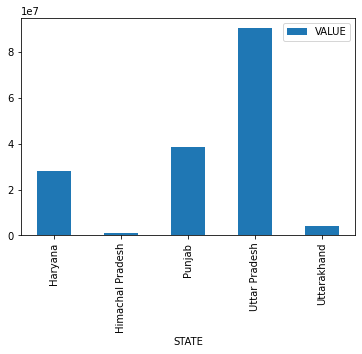

In [23]:
plt.plot(df1['STATE'], df1['VALUE'])
plt.xlabel('STATE')
plt.ylabel('VALUE')
df1.plot.bar(x='STATE', y='VALUE')
plt.show()

In [24]:
# checking Quarterly sales

In [25]:
df2=df_sales.groupby('QUARTERS').sum()['VALUE'].round()

<AxesSubplot:xlabel='QUARTERS'>

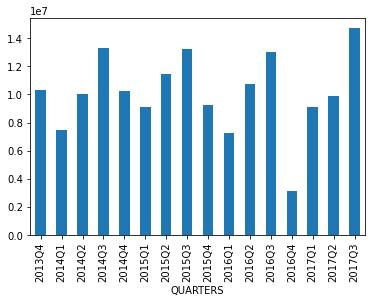

In [26]:
df2.plot.bar(x='QUARTERS', y='VALUE')

<AxesSubplot:xlabel='QUARTERS'>

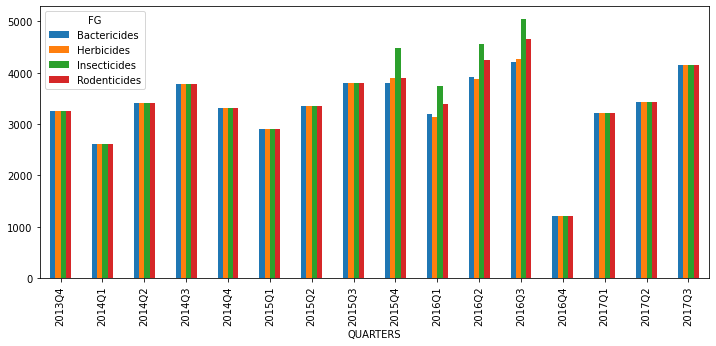

In [27]:
# checking most sold chemical in different quarters
DF= pd.crosstab(df_sales.QUARTERS, df_sales.FG)
DF.plot.bar(figsize=(12,5))

<AxesSubplot:xlabel='QUARTERS'>

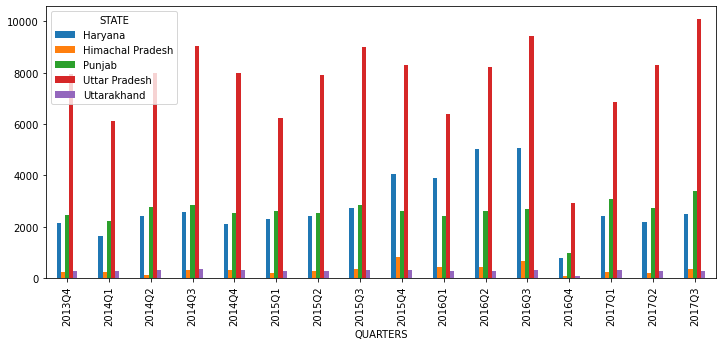

In [28]:
# checking State level sales chemical sales in different Quarters
DF1= pd.crosstab(df_sales.QUARTERS, df_sales.STATE)
DF1.plot.bar(figsize=(12,5))

In [29]:
# checking the ABC Manufacturing sales with FG Value

In [30]:
df3= (df_sales['COMPANY']=='ABC Manufacturing')

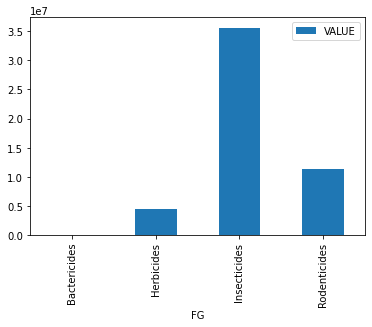

In [31]:
df4=df_sales[df3].groupby('FG').sum(['VALUE']).round()
df4.plot.bar();

In [32]:
cols=['STATE','FG', 'DISTRICT', 'COMPANY', 'QUARTERS']
nums=['FIN_YEAR','VALUE']

In [33]:
df_sales.head()

,FIN_YEAR,STATE,FG,DISTRICT,COMPANY,VALUE,QUARTERS
0,2014-11-01,Haryana,Insecticides,Rohtak,monous,675.00,2014Q3
1,2014-11-01,Haryana,Insecticides,Rewari,monous,73.71,2014Q3
2,2014-11-01,Haryana,Insecticides,Gurgaon,monous,405.00,2014Q3
3,2014-11-01,Haryana,Insecticides,Mewat,monous,1188.00,2014Q3
4,2014-11-01,Haryana,Insecticides,Palwal,monous,5188.59,2014Q3


In [34]:
df_sales.set_index('FIN_YEAR', inplace= True)

In [35]:
data=df_sales.groupby('QUARTERS')["VALUE"].sum().reset_index().round()

In [36]:
df_sales.head()

,STATE,FG,DISTRICT,COMPANY,VALUE,QUARTERS
FIN_YEAR,,,,,,
2014-11-01,Haryana,Insecticides,Rohtak,monous,675.00,2014Q3
2014-11-01,Haryana,Insecticides,Rewari,monous,73.71,2014Q3
2014-11-01,Haryana,Insecticides,Gurgaon,monous,405.00,2014Q3
2014-11-01,Haryana,Insecticides,Mewat,monous,1188.00,2014Q3
2014-11-01,Haryana,Insecticides,Palwal,monous,5188.59,2014Q3


In [37]:
data.head()

,QUARTERS,VALUE
0,2013Q4,10350463.0
1,2014Q1,7470334.0
2,2014Q2,10047232.0
3,2014Q3,13266106.0
4,2014Q4,10261207.0


In [38]:
data['QUARTERS']=pd.to_datetime(data['QUARTERS'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   QUARTERS  16 non-null     datetime64[ns]
 1   VALUE     16 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 384.0 bytes


In [40]:
data.set_index('QUARTERS', inplace= True)

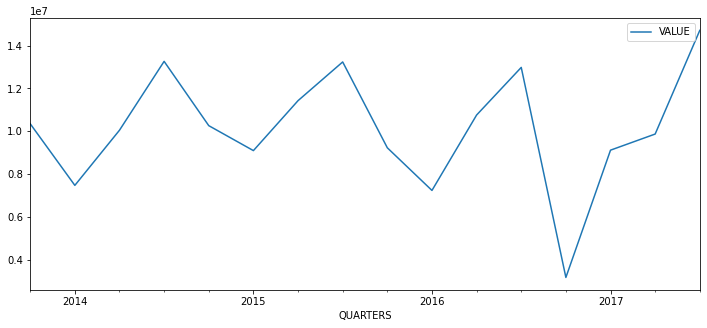

In [41]:
data.plot(figsize=(12,5));

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [43]:
#checking the stationary
#H0- Data is not stationary
#H1- Data is sationary
result=adfuller(data)
print('P value: %f' % result[1])
print('As P value is less than 0.05, so we are rejectiong null hypothesis, that means data is sationary')

P value: 0.000313
As P value is less than 0.05, so we are rejectiong null hypothesis, that means data is sationary


In [44]:
# Now decomposing the trend, seasonality & Residual in our data

In [45]:
decomposition= seasonal_decompose(data)

In [46]:
decomposition.trend.round()

QUARTERS
2013-10-01           NaN
2014-01-01           NaN
2014-04-01    10272377.0
2014-07-01    10464288.0
2014-10-01    10840154.0
2015-01-01    11009516.0
2015-04-01    10876768.0
2015-07-01    10514768.0
2015-10-01    10198070.0
2016-01-01    10082127.0
2016-04-01     9292687.0
2016-07-01     8770470.0
2016-10-01     8894714.0
2017-01-01     9000181.0
2017-04-01           NaN
2017-07-01           NaN
Name: trend, dtype: float64

In [47]:
decomposition.seasonal.round()

QUARTERS
2013-10-01   -2393195.0
2014-01-01   -1516328.0
2014-04-01     630447.0
2014-07-01    3279076.0
2014-10-01   -2393195.0
2015-01-01   -1516328.0
2015-04-01     630447.0
2015-07-01    3279076.0
2015-10-01   -2393195.0
2016-01-01   -1516328.0
2016-04-01     630447.0
2016-07-01    3279076.0
2016-10-01   -2393195.0
2017-01-01   -1516328.0
2017-04-01     630447.0
2017-07-01    3279076.0
Name: seasonal, dtype: float64

In [48]:
decomposition.resid.round()

QUARTERS
2013-10-01          NaN
2014-01-01          NaN
2014-04-01    -855592.0
2014-07-01    -477258.0
2014-10-01    1814249.0
2015-01-01    -398306.0
2015-04-01     -77611.0
2015-07-01    -555209.0
2015-10-01    1421817.0
2016-01-01   -1332401.0
2016-04-01     834374.0
2016-07-01     933638.0
2016-10-01   -3334894.0
2017-01-01    1631877.0
2017-04-01          NaN
2017-07-01          NaN
Name: resid, dtype: float64

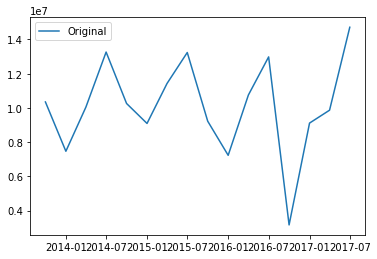

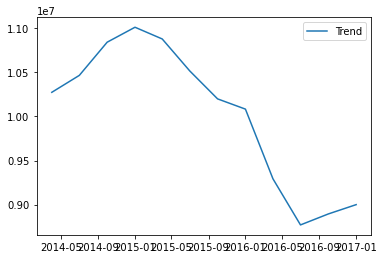

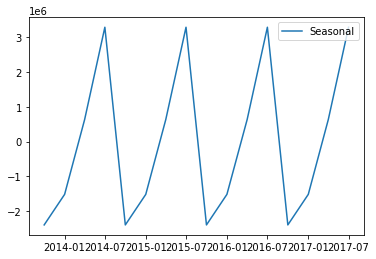

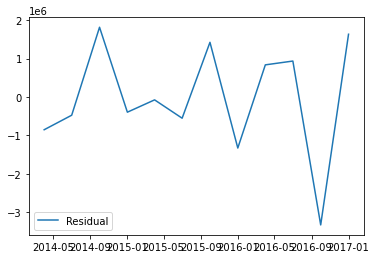

In [49]:
plt.plot(data, label='Original')
plt.legend(loc='best')

trend=decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal=decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

residual=decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc='best')

In [50]:
# ARIMA Model
import itertools

In [51]:
p = d = q = range(0,2)

In [52]:
pdq=list(itertools.product(p,d,q))
seasonal_pdq= [(x[0], x[1], x[2], 4) for x in list(itertools.product(p,d,q))]
print('SARIMAX:{}x{}'.format(pdq[1], seasonal_pdq[2]))

SARIMAX:(0, 0, 1)x(0, 1, 0, 4)


In [53]:
seasonal_pdq

[(0, 0, 0, 4),
 (0, 0, 1, 4),
 (0, 1, 0, 4),
 (0, 1, 1, 4),
 (1, 0, 0, 4),
 (1, 0, 1, 4),
 (1, 1, 0, 4),
 (1, 1, 1, 4)]

In [54]:
# Parameter selection using grid search            

In [55]:
#SARIMAX MODEL

In [56]:
from pylab import rcParams 
import statsmodels.api as sm 
for param in pdq: 
    for param_seasonal in seasonal_pdq: 
        try: 
            mod= sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order= param_seasonal)
            results= mod.fit() 
            print('ARIMA{}x{}4-AIC:{}'.format(param, param_seasonal, results.aic)) 
        except: 
            continue

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 0, 0, 4)4-AIC:564.7335476512555
ARIMA(0, 0, 0)x(0, 0, 1, 4)4-AIC:555.2262892870398


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

ARIMA(0, 0, 0)x(0, 1, 0, 4)4-AIC:386.1495694960638
ARIMA(0, 0, 0)x(0, 1, 1, 4)4-AIC:387.31107143672375


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\sta

ARIMA(0, 0, 0)x(1, 0, 0, 4)4-AIC:528.0069570536491
ARIMA(0, 0, 0)x(1, 0, 1, 4)4-AIC:530.0192169955792


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 1, 0, 4)4-AIC:387.9330015831061


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 1, 1, 4)4-AIC:389.1872169373515


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 0, 0, 4)4-AIC:558.908676206105
ARIMA(0, 0, 1)x(0, 0, 1, 4)4-AIC:558.7246584363847


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 0, 1)x(0, 1, 0, 4)4-AIC:388.0223822017647
ARIMA(0, 0, 1)x(0, 1, 1, 4)4-AIC:389.51312997670027


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 0, 4)4-AIC:557.6019470454463
ARIMA(0, 0, 1)x(1, 0, 1, 4)4-AIC:559.5309773624182


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 0, 1)x(1, 1, 0, 4)4-AIC:389.6250665637135
ARIMA(0, 0, 1)x(1, 1, 1, 4)4-AIC:391.31174043159086
ARIMA(0, 1, 0)x(0, 0, 0, 4)4-AIC:500.5073608159132
ARIMA(0, 1, 0)x(0, 0, 1, 4)4-AIC:501.8440637952937


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 1, 0)x(0, 1, 0, 4)4-AIC:364.2840662667712
ARIMA(0, 1, 0)x(0, 1, 1, 4)4-AIC:365.45020607942683
ARIMA(0, 1, 0)x(1, 0, 0, 4)4-AIC:502.4420593031016


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary s

ARIMA(0, 1, 0)x(1, 0, 1, 4)4-AIC:504.3428353486983
ARIMA(0, 1, 0)x(1, 1, 0, 4)4-AIC:366.076500478255


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 1, 4)4-AIC:365.61629736744567
ARIMA(0, 1, 1)x(0, 0, 0, 4)4-AIC:498.8875041791864
ARIMA(0, 1, 1)x(0, 0, 1, 4)4-AIC:500.0704677321648


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequen

ARIMA(0, 1, 1)x(0, 1, 0, 4)4-AIC:362.2690620914277
ARIMA(0, 1, 1)x(0, 1, 1, 4)4-AIC:364.2191294792893


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 0, 0, 4)4-AIC:500.0603080833371
ARIMA(0, 1, 1)x(1, 0, 1, 4)4-AIC:502.0222936245533


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 0, 4)4-AIC:364.19050825929287


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 4)4-AIC:365.8563924297126
ARIMA(1, 0, 0)x(0, 0, 0, 4)4-AIC:537.5074581252488


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 0, 1, 4)4-AIC:537.1301926423298
ARIMA(1, 0, 0)x(0, 1, 0, 4)4-AIC:387.5549219167477


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 1, 1, 4)4-AIC:388.80527161353655
ARIMA(1, 0, 0)x(1, 0, 0, 4)4-AIC:534.3406259068984


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 1, 4)4-AIC:536.1867008727686
ARIMA(1, 0, 0)x(1, 1, 0, 4)4-AIC:388.9805711660917


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 4)4-AIC:390.4949523223671
ARIMA(1, 0, 1)x(0, 0, 0, 4)4-AIC:533.4480258570915


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWa

ARIMA(1, 0, 1)x(0, 0, 1, 4)4-AIC:533.5051280870557
ARIMA(1, 0, 1)x(0, 1, 0, 4)4-AIC:389.28290248976646


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 1, 1, 4)4-AIC:391.0514621519778


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 0, 4)4-AIC:532.4880048369978


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 1, 4)4-AIC:534.437918890485
ARIMA(1, 0, 1)x(1, 1, 0, 4)4-AIC:391.0082864611514


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 4)4-AIC:392.78018293668936
ARIMA(1, 1, 0)x(0, 0, 0, 4)4-AIC:500.21000096072396
ARIMA(1, 1, 0)x(0, 0, 1, 4)4-AIC:501.169155216293


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 1, 0)x(0, 1, 0, 4)4-AIC:361.9580657646517
ARIMA(1, 1, 0)x(0, 1, 1, 4)4-AIC:363.8254144585542


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 0, 0, 4)4-AIC:501.029835945135
ARIMA(1, 1, 0)x(1, 0, 1, 4)4-AIC:503.0132117764616
ARIMA(1, 1, 0)x(1, 1, 0, 4)4-AIC:363.7467621606458


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 1, 0)x(1, 1, 1, 4)4-AIC:365.04663474307944
ARIMA(1, 1, 1)x(0, 0, 0, 4)4-AIC:513.0754032005718


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 1, 1)x(0, 0, 1, 4)4-AIC:516.2340773704327
ARIMA(1, 1, 1)x(0, 1, 0, 4)4-AIC:363.7644249601052


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 4)4-AIC:365.6517285907399
ARIMA(1, 1, 1)x(1, 0, 0, 4)4-AIC:516.2610793714505


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 1, 4)4-AIC:518.0874942611973
ARIMA(1, 1, 1)x(1, 1, 0, 4)4-AIC:365.5859359936054


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 4)4-AIC:366.9883278801428


In [57]:
# ARIMA(1, 1, 0)x(0, 1, 0, 4)4-AIC:361.9580657646517 choosed best perameter as they have lowest AIC value.

In [58]:
# ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(data["VALUE"], order= (1,1,0))
res=model.fit()
res.summary()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.VALUE   No. Observations:                   15
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -248.338
Method:                       css-mle   S.D. of innovations        3733380.712
Date:                Sun, 02 Jan 2022   AIC                            502.675
Time:                        01:22:06   BIC                            504.799
Sample:                    01-01-2014   HQIC                           502.653
                         - 07-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.91e+05   7.33e+05      0.397      0.691   -1.14e+06    1.73e+06
ar.L1.D.VALUE    -0.3395      0.249     -1.364      0.173      -0.827       0.148
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9459           +0.0000j            2.9459            0.5000
-----------------------------------------------------------------------------
"""

#As per the seasonal graph the data has some seasonality in it in that case SARIMAX would be the best fit for forcasting instead of ARIMA.

In [59]:
# Fitting the SARIMA Model
mod= sm.tsa.statespace.SARIMAX(data, order= (1, 1, 0), seasonal_order=(0, 1, 0, 4))
results= mod.fit()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [60]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3400      0.127     -2.687      0.007      -0.588      -0.092
sigma2      6.528e+12   3.69e-15   1.77e+27      0.000    6.53e+12    6.53e+12


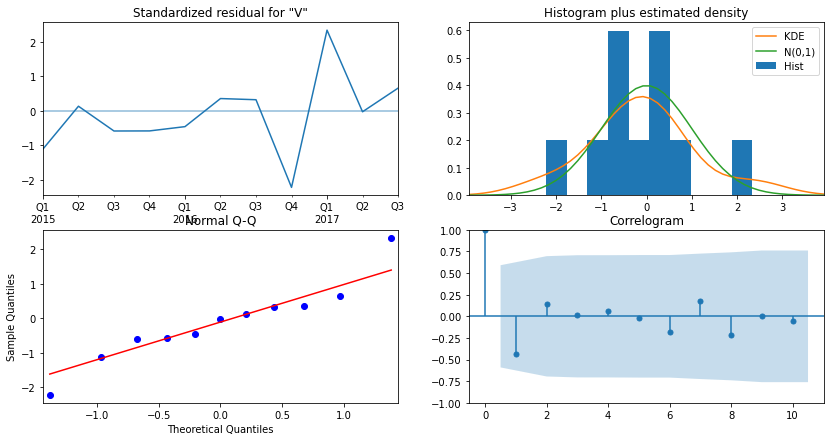

In [61]:
results.plot_diagnostics(figsize=(14,7))
plt.show()

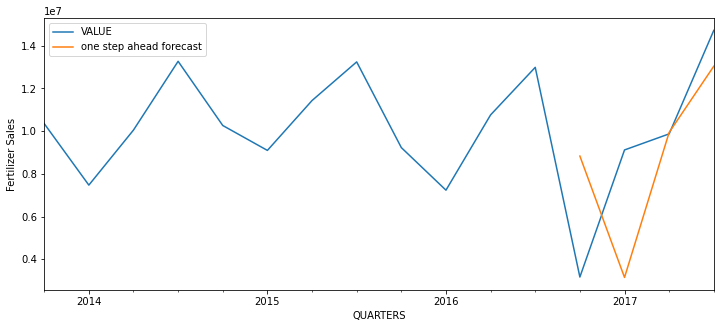

In [62]:
pred=results.get_prediction(start=pd.to_datetime('2016-10-01'),dynamic=False)
pred_ci=pred.conf_int()
ax=data.plot(label='observed', figsize= (12,5))
pred.predicted_mean.plot(ax=ax, label='one step ahead forecast', figsize= (12,5))

ax.set_xlabel("QUARTERS")
ax.set_ylabel("Fertilizer Sales")
plt.legend()
plt.show()

In [63]:
pred.predicted_mean.round()

2016-10-01     8829560.0
2017-01-01     3147188.0
2017-04-01     9939029.0
2017-07-01    13036981.0
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [64]:
data['2016-10-01':]

,VALUE
QUARTERS,
2016-10-01,3166624.0
2017-01-01,9115731.0
2017-04-01,9869125.0
2017-07-01,14715308.0


In [67]:
mape= ((data_actual-data_forcast)/data_actual)*len(data_actual)

In [68]:
mape

VALUE    0.051917
dtype: float64

#Calculating MSE & RMSE

In [66]:
data_forcast=pred.predicted_mean.mean()
data_actual=data['2016-10-01':].mean()
MSE=((data_forcast-data_actual)**2).mean()
RMSE=round(np.sqrt(MSE),2)

In [66]:
RMSE

478507.25

In [67]:
#Forcasting sales for 2018 Quarters

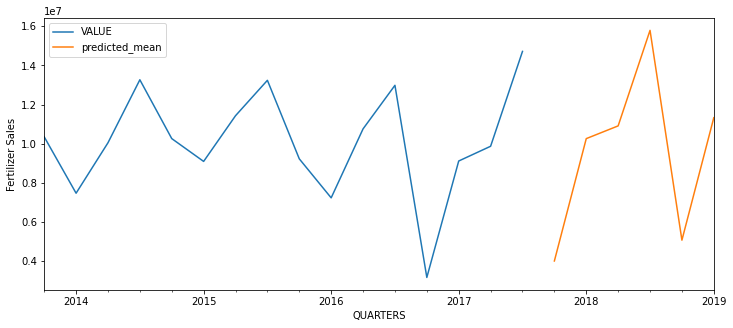

In [68]:
pred_uc=results.get_forecast(steps=6)
pred_ci=pred_uc.conf_int()
ax=data.plot(label='observed', figsize= (12,5))
pred_uc.predicted_mean.plot(ax=ax)

ax.set_xlabel("QUARTERS")
ax.set_ylabel("Fertilizer Sales")
plt.legend()
plt.show()


In [69]:
#Now forcasting the sales for ANC Manufacturing Company
ABC= sale_data[sale_data['COMPANY'] == 'ABC Manufacturing']

In [70]:
ABC

,STATE,FG,DISTRICT,COMPANY,VALUE,QUARTERS
FIN_YEAR,,,,,,
2014-12-01,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014Q3
2014-12-01,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014Q3
2014-12-01,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014Q3
2014-12-01,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014Q3
2014-12-01,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014Q3
...,...,...,...,...,...,...
2016-02-01,Punjab,Bactericides,Barnala,ABC Manufacturing,0.000,2015Q4
2016-12-01,Uttar Pradesh,Bactericides,Faizabad,ABC Manufacturing,0.000,2016Q3
2016-12-01,Uttar Pradesh,Bactericides,Basti,ABC Manufacturing,0.000,2016Q3


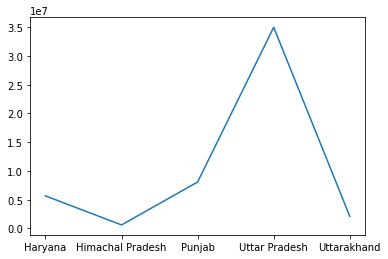

In [71]:
ABC_STATE=ABC.groupby('STATE').sum()['VALUE'].round()

plt.plot(ABC_STATE)

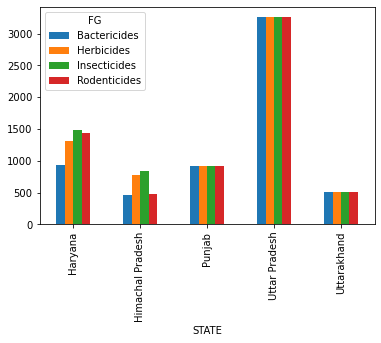

In [72]:
# State wise sales with chemicalfor ABC Manufacturing company
DF2=pd.crosstab(ABC.STATE, ABC.FG)
DF2.plot.bar();

<AxesSubplot:xlabel='QUARTERS'>

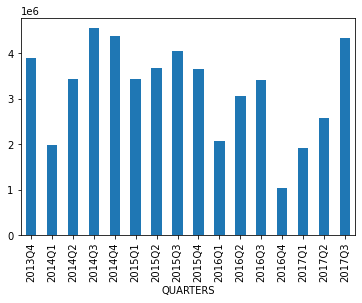

In [73]:
ABC_QUARTERS=ABC.groupby('QUARTERS').sum()['VALUE']
ABC_QUARTERS.plot.bar()

In [74]:
ABC_data=ABC.groupby('QUARTERS')["VALUE"].sum().reset_index().round()

<AxesSubplot:>

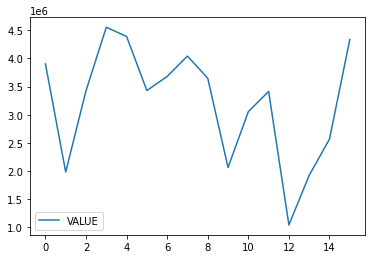

In [75]:
ABC_data.plot()

In [76]:
ABC_data.set_index('QUARTERS', inplace= True)

In [77]:
p=d=q=(0,2)

In [78]:
from pylab import rcParams 
import statsmodels.api as sm 
for param in pdq: 
    for param_seasonal in seasonal_pdq: 
        try: 
            mod= sm.tsa.statespace.SARIMAX(ABC_data, order=param, seasonal_order= param_seasonal)
            results= mod.fit() 
            print('ARIMA{}x{}4-AIC:{}'.format(param, param_seasonal, results.aic)) 
        except: 
            continue

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible 

ARIMA(0, 0, 0)x(0, 0, 0, 4)4-AIC:528.3448573834853
ARIMA(0, 0, 0)x(0, 0, 1, 4)4-AIC:584.9105571194801
ARIMA(0, 0, 0)x(0, 1, 0, 4)4-AIC:369.8319725526373
ARIMA(0, 0, 0)x(0, 1, 1, 4)4-AIC:371.2188712672597
ARIMA(0, 0, 0)x(1, 0, 0, 4)4-AIC:502.2801767101896


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 0, 0)x(1, 0, 1, 4)4-AIC:504.3389714565004
ARIMA(0, 0, 0)x(1, 1, 0, 4)4-AIC:371.37431350028396
ARIMA(0, 0, 0)x(1, 1, 1, 4)4-AIC:372.6348690643761
ARIMA(0, 0, 1)x(0, 0, 0, 4)4-AIC:521.5123876550739


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 0, 1)x(0, 0, 1, 4)4-AIC:521.5967298090885
ARIMA(0, 0, 1)x(0, 1, 0, 4)4-AIC:370.4816070894444
ARIMA(0, 0, 1)x(0, 1, 1, 4)4-AIC:372.4360316441873
ARIMA(0, 0, 1)x(1, 0, 0, 4)4-AIC:520.6777383660417
ARIMA(0, 0, 1)x(1, 0, 1, 4)4-AIC:522.6157036279831


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 0, 1)x(1, 1, 0, 4)4-AIC:372.4570107916706
ARIMA(0, 0, 1)x(1, 1, 1, 4)4-AIC:373.2789311411551
ARIMA(0, 1, 0)x(0, 0, 0, 4)4-AIC:464.77041303272176


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 1, 0)x(0, 0, 1, 4)4-AIC:475.1262282560587
ARIMA(0, 1, 0)x(0, 1, 0, 4)4-AIC:342.1912557978558
ARIMA(0, 1, 0)x(0, 1, 1, 4)4-AIC:342.6351340476493
ARIMA(0, 1, 0)x(1, 0, 0, 4)4-AIC:466.43858740194787
ARIMA(0, 1, 0)x(1, 0, 1, 4)4-AIC:468.54878201416585


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 1, 0)x(1, 1, 0, 4)4-AIC:342.4149891607781
ARIMA(0, 1, 0)x(1, 1, 1, 4)4-AIC:342.29616517657763
ARIMA(0, 1, 1)x(0, 0, 0, 4)4-AIC:463.71183274536105
ARIMA(0, 1, 1)x(0, 0, 1, 4)4-AIC:465.27657066069753


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 1, 1)x(0, 1, 0, 4)4-AIC:341.49547878503205
ARIMA(0, 1, 1)x(0, 1, 1, 4)4-AIC:343.37890257945617
ARIMA(0, 1, 1)x(1, 0, 0, 4)4-AIC:465.2404373189388
ARIMA(0, 1, 1)x(1, 0, 1, 4)4-AIC:467.2404092302032


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(0, 1, 1)x(1, 1, 0, 4)4-AIC:343.31898443199486
ARIMA(0, 1, 1)x(1, 1, 1, 4)4-AIC:344.28322570291004


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 0, 0)x(0, 0, 0, 4)4-AIC:499.5770587939343
ARIMA(1, 0, 0)x(0, 0, 1, 4)4-AIC:500.3013069222021
ARIMA(1, 0, 0)x(0, 1, 0, 4)4-AIC:369.77009564760033
ARIMA(1, 0, 0)x(0, 1, 1, 4)4-AIC:371.05737421715986


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 0, 0)x(1, 0, 0, 4)4-AIC:498.49976060607236
ARIMA(1, 0, 0)x(1, 0, 1, 4)4-AIC:499.8186987847078
ARIMA(1, 0, 0)x(1, 1, 0, 4)4-AIC:371.26243657066755


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 0, 0)x(1, 1, 1, 4)4-AIC:372.1924383284481
ARIMA(1, 0, 1)x(0, 0, 0, 4)4-AIC:498.8418723379406
ARIMA(1, 0, 1)x(0, 0, 1, 4)4-AIC:499.27449454249535
ARIMA(1, 0, 1)x(0, 1, 0, 4)4-AIC:371.23289692707016


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 0, 1)x(0, 1, 1, 4)4-AIC:372.3154723784265
ARIMA(1, 0, 1)x(1, 0, 0, 4)4-AIC:498.8455346216432


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 1, 4)4-AIC:500.2811600945148
ARIMA(1, 0, 1)x(1, 1, 0, 4)4-AIC:372.6396359200832
ARIMA(1, 0, 1)x(1, 1, 1, 4)4-AIC:373.56825113153076


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 1, 0)x(0, 0, 0, 4)4-AIC:464.1912123118659
ARIMA(1, 1, 0)x(0, 0, 1, 4)4-AIC:465.48555050127396
ARIMA(1, 1, 0)x(0, 1, 0, 4)4-AIC:340.52372702252416
ARIMA(1, 1, 0)x(0, 1, 1, 4)4-AIC:342.51057466107613
ARIMA(1, 1, 0)x(1, 0, 0, 4)4-AIC:465.3845983678623


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 1, 0)x(1, 0, 1, 4)4-AIC:467.3840552051655
ARIMA(1, 1, 0)x(1, 1, 0, 4)4-AIC:342.50348339823466
ARIMA(1, 1, 0)x(1, 1, 1, 4)4-AIC:343.7558066478975


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 0, 0, 4)4-AIC:465.7435005658044
ARIMA(1, 1, 1)x(0, 0, 1, 4)4-AIC:467.55783655117796
ARIMA(1, 1, 1)x(0, 1, 0, 4)4-AIC:342.46641159098573
ARIMA(1, 1, 1)x(0, 1, 1, 4)4-AIC:344.43246623684297


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

ARIMA(1, 1, 1)x(1, 0, 0, 4)4-AIC:467.5274453337451
ARIMA(1, 1, 1)x(1, 0, 1, 4)4-AIC:469.519005011407


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 0, 4)4-AIC:344.4074797917461
ARIMA(1, 1, 1)x(1, 1, 1, 4)4-AIC:345.3455791610288


C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [79]:
#ARIMA(0, 1, 1)x(0, 1, 0, 4)4-AIC:341.49547878503205

In [80]:
# Fitting the ARIMA Model
import statsmodels.api as sm

model2= sm.tsa.statespace.SARIMAX(ABC_data, order= (0, 1, 1), seasonal_order=(0, 1, 0, 4))
results1=model2.fit()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [81]:
print(results1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2513      0.320     -0.785      0.432      -0.879       0.376
sigma2      1.398e+12   6.76e-14   2.07e+25      0.000     1.4e+12     1.4e+12


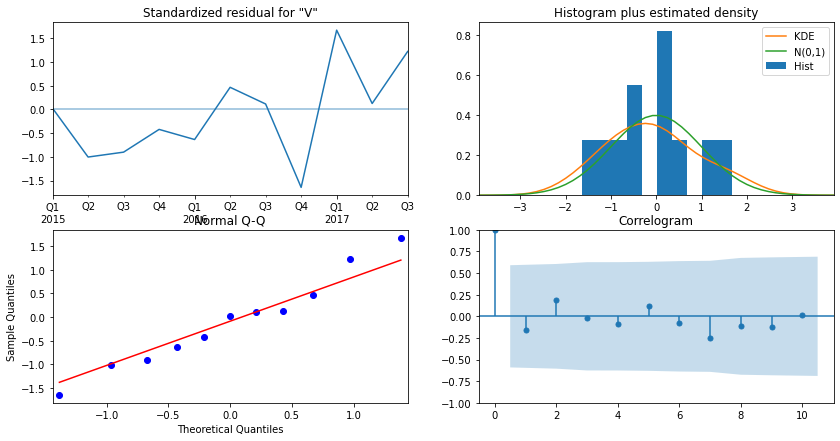

In [82]:
results1.plot_diagnostics(figsize=(14,7))
plt.show()

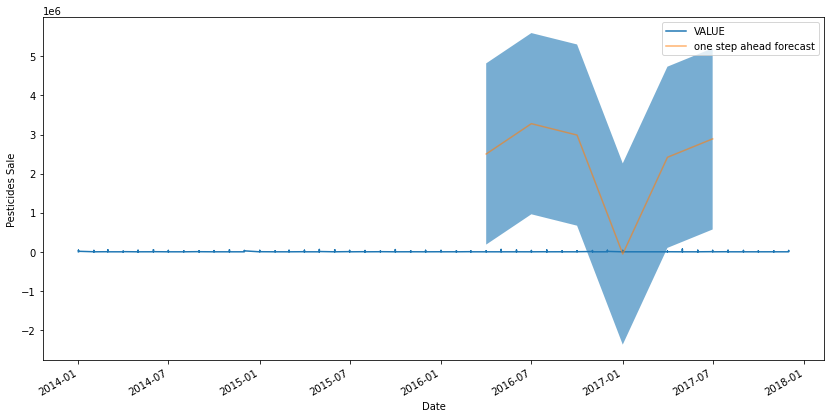

In [83]:
pred1= results1.get_prediction(start= pd.to_datetime("2016-04-01"),dynamic= False)
pred_ci1= pred1.conf_int()
ax=ABC["2014-01-01":].plot(label="observed")
pred1.predicted_mean.plot(ax=ax,label="one step ahead forecast", alpha =.6, figsize=(14,7))
ax.fill_between(pred_ci1.index,
               pred_ci1.iloc[:,0],
               pred_ci1.iloc[:,1],alpha=.6)
ax.set_xlabel("Date")
ax.set_ylabel("Pesticides Sale")
plt.legend()
plt.show()

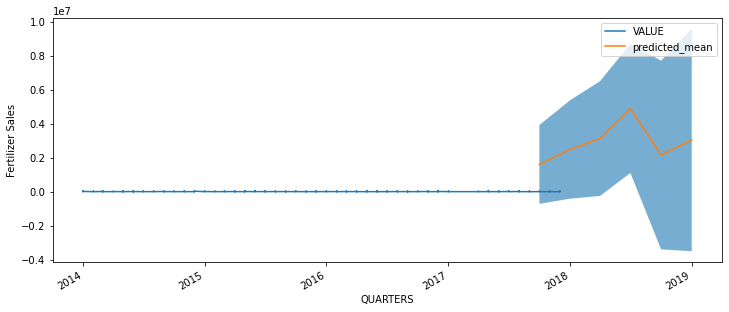

In [84]:
pred_uc1=results1.get_forecast(steps=6)
pred_ci1=pred_uc1.conf_int()
ax=ABC.plot(label='observed', figsize= (12,5))
pred_uc1.predicted_mean.plot(ax=ax)
ax.fill_between(pred_ci1.index,
               pred_ci1.iloc[:,0],
               pred_ci1.iloc[:,1],alpha=.6)

ax.set_xlabel("QUARTERS")
ax.set_ylabel("Fertilizer Sales")
plt.legend()
plt.show()

In [85]:
pred_uc1.predicted_mean.round()

2017-10-01    1599472.0
2018-01-01    2481073.0
2018-04-01    3124960.0
2018-07-01    4893629.0
2018-10-01    2157556.0
2019-01-01    3039157.0
Freq: QS-OCT, Name: predicted_mean, dtype: float64